<a href="https://colab.research.google.com/github/ArashRasti/Sequences-Time-Series-and-Prediction/blob/main/C4/W1/ungraded_labs/C4_W1_Lab_1_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In the screencast for this lesson I go through a few scenarios for time series. This notebook contains the code for that with a few little extras! :)

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# Trend and Seasonality

In [4]:
def trend(time, slope=0):
    return slope * time

Let's create a time series that just trends upward:

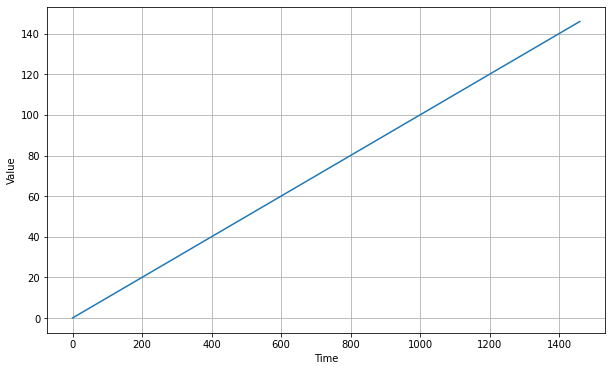

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now let's generate a time series with a seasonal pattern:

In [6]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.5,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

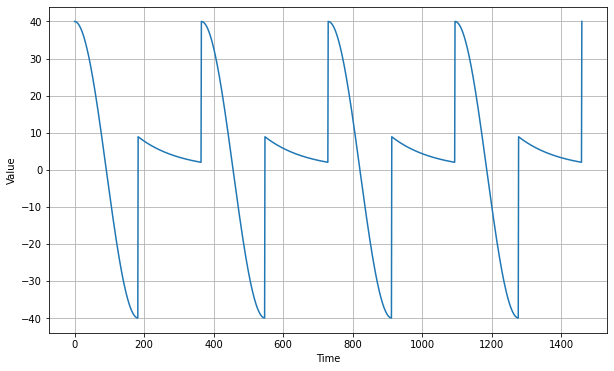

In [7]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now let's create a time series with both trend and seasonality:

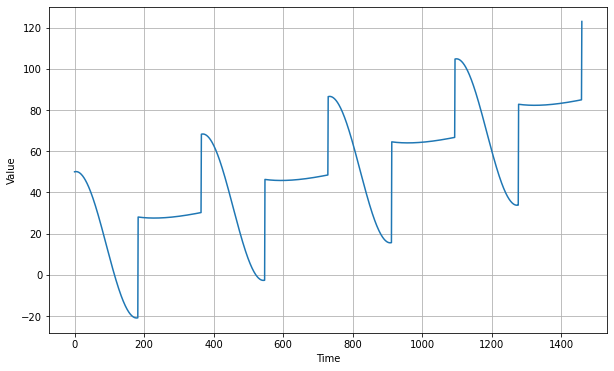

In [8]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# Noise

In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

In [9]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

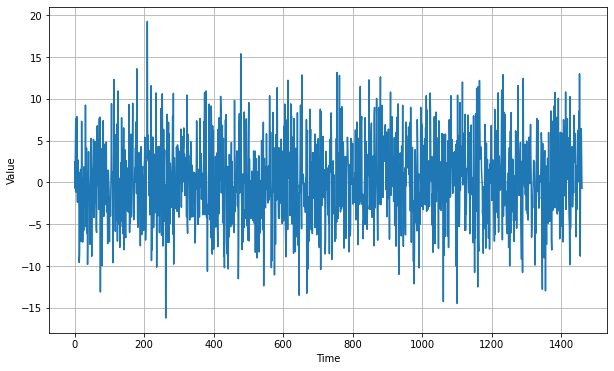

In [10]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

[0.00019832 0.00079326 0.00079326 0.00297473 0.00237979 0.00793262
 0.01269219 0.02359955 0.03054059 0.04739741 0.0739717  0.09538978
 0.12434384 0.14992655 0.1556777  0.15647096 0.1493316  0.13862256
 0.12434384 0.09499314 0.06703065 0.04957889 0.03331701 0.01646019
 0.0140804  0.00793262 0.00317305 0.00158652 0.00079326 0.00019832] [-7.72297652 -7.09266787 -6.46235922 -5.83205058 -5.20174193 -4.57143329
 -3.94112464 -3.310816   -2.68050735 -2.05019871 -1.41989006 -0.78958142
 -0.15927277  0.47103587  1.10134452  1.73165317  2.36196181  2.99227046
  3.6225791   4.25288775  4.88319639  5.51350504  6.14381368  6.77412233
  7.40443097  8.03473962  8.66504827  9.29535691  9.92566556 10.5559742
 11.18628285] <a list of 30 Patch objects>


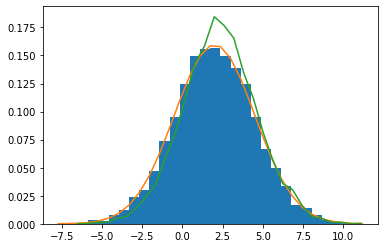

In [11]:
rng = np.random.default_rng()
n0 = rng.standard_normal(8000)
# print(n0)
n1 = 2 + 2.5 * n0
# print(n1)
sigma = 2.5
mu = 2
n2 = rng.normal(2, 2.25, 8000)
# print(n2)

count, bins, ignored = plt.hist(n1, 30, density=True)
print(count, bins, ignored)
# plt.plot(bins[1:], count)
plt.plot(bins, 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

h, e = np.histogram(n2, 30, density=True)
plt.plot( e[1:], h)

[ 0.60475933  1.65350501  1.56529517 ... -1.31785848 -2.19348819
  1.21289862] 4.054812860228066
3.9262377064363267
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0006119  0.00087268
 0.00123222 0.00172257 0.00238409 0.00326682 0.00443185 0.00595253
 0.00791545 0.01042093 0.01358297 0.0175283  0.02239453 0.02832704
 0.03547459 0.0439836  0.05399097 0.06561581 0.07895016 0.09404908
 0.11092083 0.1295176  0.1

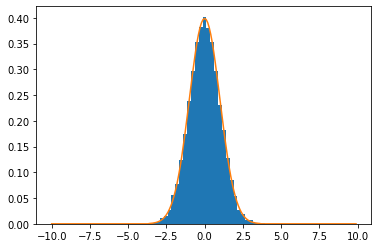

In [12]:
from copy import deepcopy
rng = np.random.default_rng()
n0 = rng.standard_normal(8000)
print(n0, max(n0))


rnd = np.random.RandomState(42)
b = rnd.randn(8000)
print(max(b))
count, bins, ignored = plt.hist(b, 30, density=True)

sigma = 1
mu = 0
bins = np.arange(-10, 10, 0.1)
a = 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
a[a < 0.0005] = 0
c = a.copy()
c[c==0] = 1000
print(a)
plt.plot(bins, a)

print(min(c), bins[np.argmin(c)])


Now let's add this white noise to the time series:

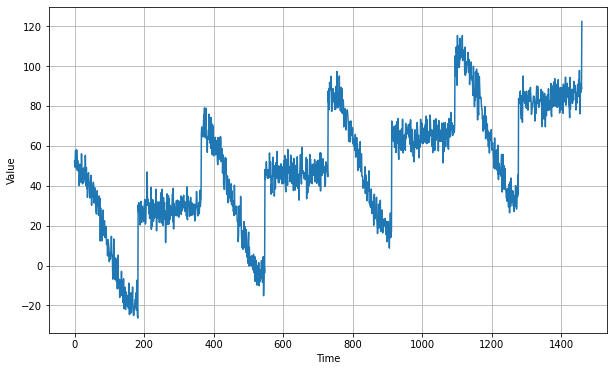

In [13]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods: the training period and the validation period (in many cases, you would also want to have a test period). The split will be at time step 1000.

In [14]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [15]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.1
    φ2 = -0.1
    ar = rnd.randn(len(time) + 2)
    ar[:2] = 100    
    for step in range(2, len(time) + 2):
        ar[step] += φ1 * ar[step - 1]
        ar[step] += φ2 * ar[step - 2]   
    b = ar[2:] * amplitude
    return b

In [16]:
def autocorrelation(time, amplitude, f=0.8, seed=None):
    rnd = np.random.RandomState(seed)
    φ = f
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

In [17]:
def autocorrelation2(time, amplitude, f=0.8, seed=None):
    rnd = np.random.RandomState(seed)
    φ = f
    ar = rnd.randn(len(time) + 1)
    w = 50
    ar2 = ar.copy()
    for step in range(1, len(time) + 1):
        m = max(0, step - w)
        ar[step] = np.mean(ar[m:step])
    return ar2[1:] * amplitude

In [18]:
def autocorrelation3(time, amplitude, f=0.8, seed=None):
    rnd = np.random.RandomState(seed)
    φ = f
    ar = rnd.randn(len(time) + 1)
    return ar[1:] * amplitude

In [57]:
def autocorrelation4(time, amplitude, f=0.8, seed=None):
    rnd = np.random.RandomState(seed)
    φ = f
    ar = rnd.randn(len(time) + 1)
    a1 = ar[1:] - ar[0:len(ar)-1]
    return ar[1:] * amplitude

In [19]:

series1 = autocorrelation2(time, 1, seed=42)
series2 = autocorrelation(time, 1, seed=42)
series3 = autocorrelation3(time, 1, seed=42)
series4 = autocorrelation4(time, 1, seed=42)

print(series1)
plot_series(time[:], series1[:])
plt.show()
plot_series(time[:], series2[:])
plt.show()
plot_series(time[:], series3[:])
plt.show()
plot_series(time[:], series4[:])
plt.show()

NameError: ignored

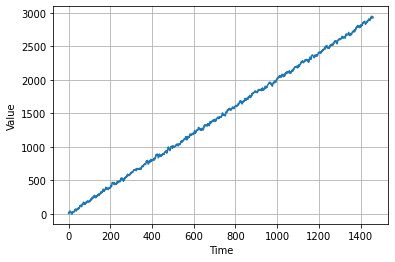

In [20]:
series1 = autocorrelation(time, 10, 0.8, seed=42) + trend(time, 2)
plot_series(time[:], series1[:])
# plt.plot(time)
plt.show()

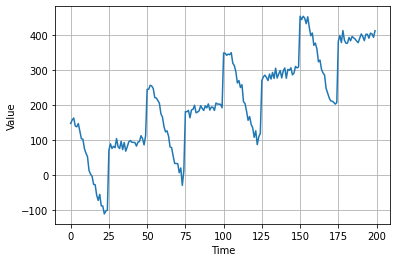

In [21]:
series = autocorrelation(time, 10, -0.2, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

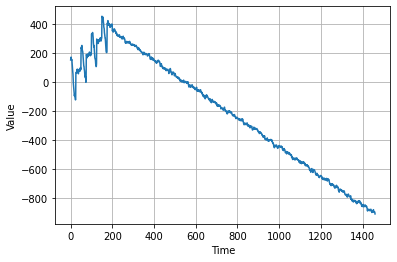

In [22]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series3 = series.copy()
series3[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:], series3[:])
plt.show()

In [23]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series    

1461


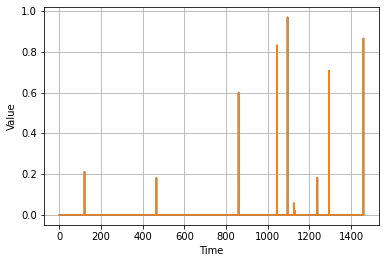

In [51]:
series = impulses(time, 10, seed=42)
print(len(time))
plot_series(time, series)
plt.plot(series)
plt.show()

In [25]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

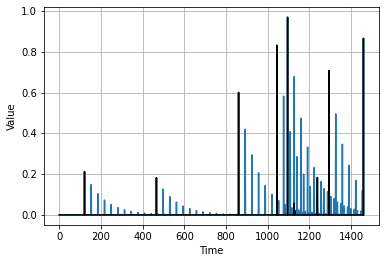

In [52]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {32: 0.7})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

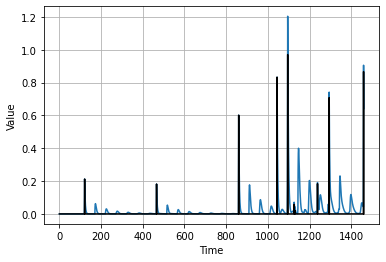

In [53]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1:0.7, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

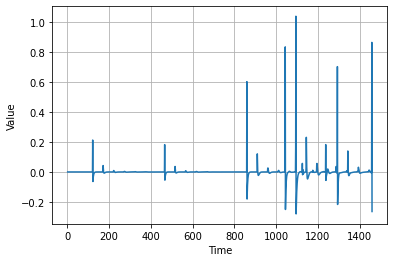

In [47]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

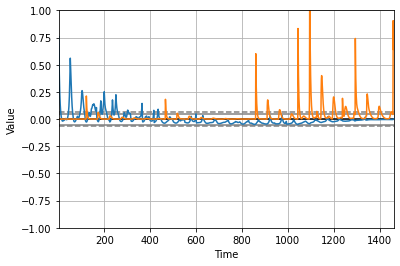

In [54]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plot_series(time, series)

In [55]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Sun, 13 Mar 2022   AIC                          -4432.855
Time:                        15:02:55   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

In [56]:
# Sunspots.csv
!gdown --id 1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

Downloading...
From: https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5
To: /content/Sunspots.csv
100% 70.8k/70.8k [00:00<00:00, 14.7MB/s]


In [59]:
import pandas as pd

df = pd.read_csv('./Sunspots.csv', parse_dates=["Date"], index_col="Date")
series = df["Monthly Mean Total Sunspot Number"].asfreq("1M")
series.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Freq: M, Name: Monthly Mean Total Sunspot Number, dtype: float64

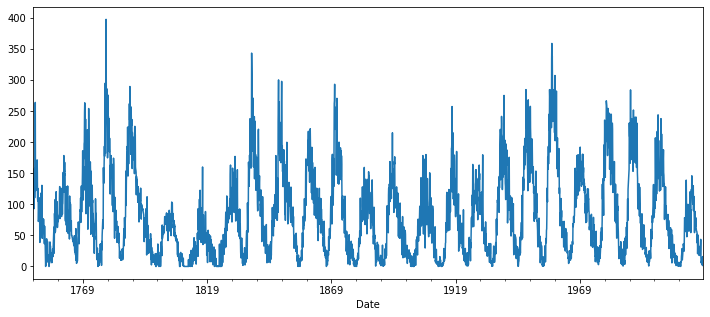

In [60]:
series.plot(figsize=(12, 5))

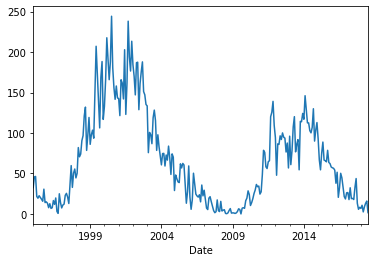

In [64]:
series["1995-01-01":].plot()

(0.0, 100.0, -50.0, 50.0)

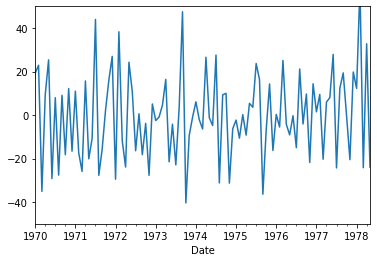

In [62]:
series.diff(1).plot()
plt.axis([0, 100, -50, 50])

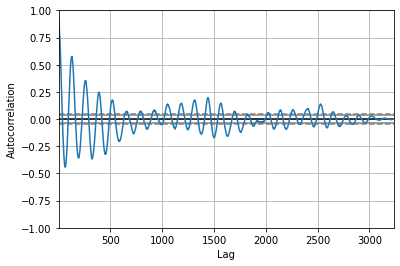

In [63]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

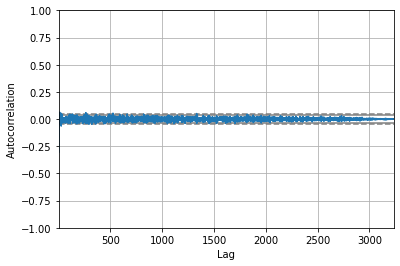

In [65]:
autocorrelation_plot(series.diff(1)[1:])

(0.0, 500.0, -0.1, 0.1)

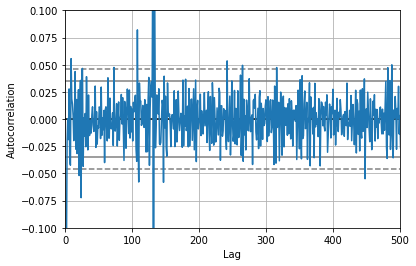

In [94]:
autocorrelation_plot(series.diff(1)[1:].diff(11 * 12)[11*12+1:])
plt.axis([0, 500, -0.1, 0.1])

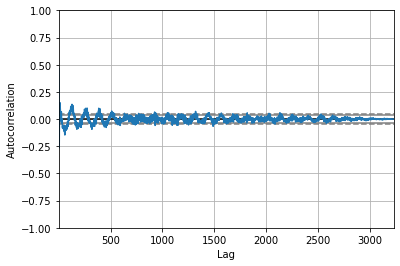

In [93]:
autocorrelation_plot(series.diff(5)[5:])
# plt.axis([0, 50, -0.1, 0.1])

In [75]:
116.7 - 104.3

12.400000000000006

In [92]:
[series.autocorr(lag) for lag in range(1, 50)]

[0.9173241872367174,
 0.8847544206843755,
 0.868599123137202,
 0.8579945644357173,
 0.8433856340533112,
 0.8306731729540908,
 0.8121138897370149,
 0.7986059878541056,
 0.7890399489112041,
 0.7689560950230403,
 0.7474788716472306,
 0.7238791854325145,
 0.6980482665379879,
 0.6751408790165827,
 0.6495670049994807,
 0.6170092179855494,
 0.5872028494447984,
 0.5537209387574675,
 0.5254318210710769,
 0.49453915657274083,
 0.4609225001523783,
 0.4325062022560218,
 0.4054329883610248,
 0.36959289593532285,
 0.3443549899460771,
 0.3106967622634346,
 0.2711411693399097,
 0.23646964014948227,
 0.20297806535027266,
 0.17379537689762675,
 0.14010793836897956,
 0.11227445177460688,
 0.07751076852866026,
 0.044054957960606746,
 0.012510863120931944,
 -0.017282156504566333,
 -0.046433352357512225,
 -0.07440203532677167,
 -0.10339501296715731,
 -0.12680806162977237,
 -0.1530928264197593,
 -0.17906178224521474,
 -0.20506772757843425,
 -0.22530867957591932,
 -0.2466587000579558,
 -0.26904607854968615,
 

In [145]:
#Read a comma-separated values (csv) file into DataFrame.
series = pd.read_csv('./Sunspots.csv', sep=',', delimiter=None, header='infer', names=None, 
            index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, 
            dtype=None, engine=None, converters=None, true_values=None, false_values=None, 
            skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, 
            keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, 
            infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, 
            chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', 
            quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, 
            error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, 
            low_memory=True, memory_map=False, float_precision=None)


print(series)
print(series.columns)
series = series["Monthly Mean Total Sunspot Number"]

print(series)

      Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0              0  1749-01-31                               96.7
1              1  1749-02-28                              104.3
2              2  1749-03-31                              116.7
3              3  1749-04-30                               92.8
4              4  1749-05-31                              141.7
...          ...         ...                                ...
3230        3230  2018-03-31                                2.5
3231        3231  2018-04-30                                8.9
3232        3232  2018-05-31                               13.2
3233        3233  2018-06-30                               15.9
3234        3234  2018-07-31                                1.6

[3235 rows x 3 columns]
Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')
0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3230      2.5
3231      8.9
3232     13.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


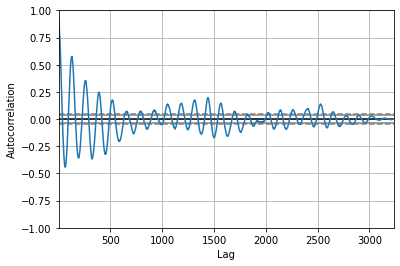

In [146]:
from pandas.plotting import autocorrelation_plot

series_diff = series
# for lag in range(1):
#   series_diff = series_diff[1:] - series_diff[:-1]

autocorrelation_plot(series_diff)

[-0.30310516233411805, -0.0992836381182127, -0.03367871451240893, 0.024453356537796525, -0.011497636073942545, 0.03556389897792739, -0.031130930541416385, -0.0237852440413157, 0.06358476109221067, 0.012875220010160343, 0.008677820627112282, 0.01308520530898538, -0.01777769934567388, 0.016338929044762727, 0.04255881267637732, -0.017049042157740103, 0.02256674696378871, -0.03190464399511404, 0.01584467720905343, 0.016246579688269907, -0.03152187892830776, -0.007893806193995666, 0.053324700022723576, -0.06486546741042011, 0.05094422748770964, 0.03658760386660446, -0.030169919815457982, -0.006740367532139598, -0.02602575409181002, 0.027241150045317436, -0.03548508428811963, 0.04260146671223103, -0.007930219192844175, -0.011201683553771283, -0.011269790724975519, -0.0037795217636400094, -0.007305878807614467, 0.00674444652838317, -0.03425491386129546, 0.016740382366763614, -0.0013185044178249021, 0.0006471575715732554, -0.03402733179867274, 0.006466594456294723, 0.005769254770858575, -0.020

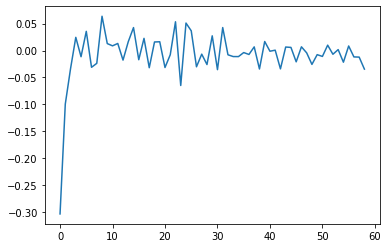

In [148]:
series_diff1 = pd.Series(series[1:].to_numpy() - series[:-1].to_numpy())
# series_diff1 = series.diff(1)
autocorrs = [series_diff1.autocorr(lag) for lag in range(1, 60)]
print(autocorrs)
plt.plot(autocorrs)
plt.show()